Task 3 : Rotate an image by 45 and 90 degrees.  

Import Required Libraries

In [7]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os


Load the Image

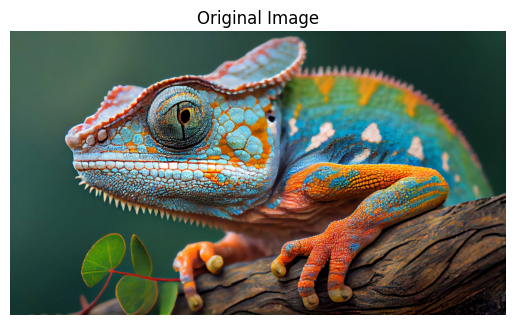

In [8]:
image_path = '../data/input_image.jpg'  # Adjust if needed

# Load image in RGB
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()


Define Rotation Function

In [9]:
def rotate_image(image, angle):

    """Rotate an image around its center by given angle. The canvas size is adjusted to fit the whole image."""
    
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    # Get the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Calculate the new bounding dimensions
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    # Adjust the rotation matrix to consider translation
    M[0, 2] += (new_w / 2) - center[0]
    M[1, 2] += (new_h / 2) - center[1]

    # Perform the rotation
    rotated = cv2.warpAffine(image, M, (new_w, new_h), borderMode=cv2.BORDER_REPLICATE)
    return rotated


Apply Rotations

In [10]:
rotated_45 = rotate_image(img, 45)
rotated_90 = rotate_image(img, 90)


Display Results

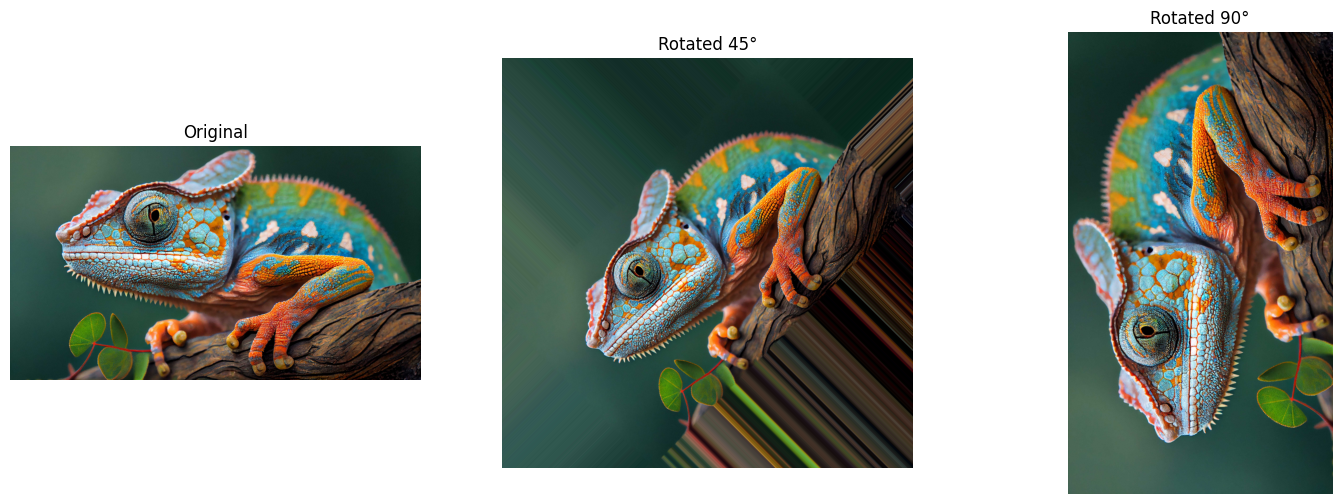

In [11]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rotated_45)
plt.title("Rotated 45°")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rotated_90)
plt.title("Rotated 90°")
plt.axis('off')

plt.show()


Save Rotated Images

In [12]:
output_dir = '../outputs/task3'
os.makedirs(output_dir, exist_ok=True)

Image.fromarray(rotated_45).save(os.path.join(output_dir, 'rotated_45.jpg'))
Image.fromarray(rotated_90).save(os.path.join(output_dir, 'rotated_90.jpg'))

print("Rotated images saved to:", output_dir)


Rotated images saved to: ../outputs/task3
